**Importing Packages**

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential,load_model,save_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

**Reading the dataset**

In [32]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [33]:
print(f"Shape of the Dataset: {x_train.shape}")

Shape of the Dataset: (50000, 32, 32, 3)


In [34]:
x_train = x_train / 255
x_test = x_test / 255

**Creating Model**

In [35]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='sigmoid'))
  return model

In [36]:
model = create_model()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

In [37]:
history = model.fit(x_train,y_train,batch_size=64,epochs=50,validation_split=0.2,validation_data=(x_test,y_test))

Epoch 1/50
782/782 [==============================] - 7s 6ms/step - loss: 1.6030 - acc: 0.4063 - val_loss: 1.2821 - val_acc: 0.5417
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2442 - acc: 0.5557 - val_loss: 1.1350 - val_acc: 0.5980
Epoch 3/50
782/782 [==============================] - 4s 6ms/step - loss: 1.0898 - acc: 0.6173 - val_loss: 0.9955 - val_acc: 0.6478
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9930 - acc: 0.6529 - val_loss: 0.9638 - val_acc: 0.6702
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9209 - acc: 0.6788 - val_loss: 0.9169 - val_acc: 0.6807
Epoch 6/50
782/782 [==============================] - 4s 6ms/step - loss: 0.8607 - acc: 0.7001 - val_loss: 0.8682 - val_acc: 0.6989
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 0.8192 - acc: 0.7173 - val_loss: 0.8466 - val_acc: 0.7099
Epoch 8/50
782/782 [==============================] - 4s 5ms/step - loss: 0.

In [41]:
loss,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2625 - acc: 0.7094


In [42]:
print(f"Loss: {loss}\nAccuracy: {acc}")

Loss: 1.2625433206558228
Accuracy: 0.7093999981880188


**Plotting the History**

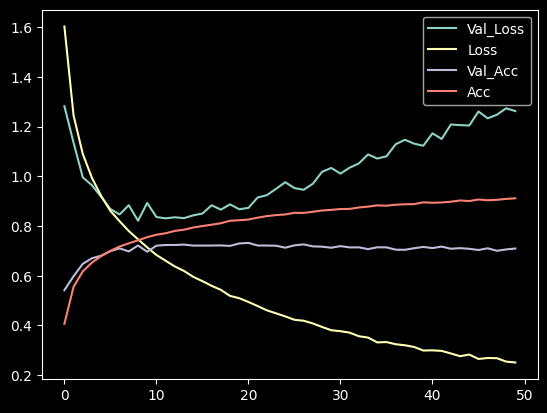

In [44]:
plt.plot(history.history['val_loss'],label="Val_Loss")
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_acc'],label="Val_Acc")
plt.plot(history.history['acc'],label="Acc")
plt.legend()
plt.show()

**Loading the Model**

In [47]:
model.save('model.h5')